### MNIST 데이터셋 CNN 활용하기
MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국
직원 등이 쓴 손글씨를 이용해 만든 데이터로 구성되어 있음
 * 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
 * 머신러닝을 배우는 사람이라면 자신의 알고리즘과 다른 알고리즘의 성과

 * 이미지는 가로 28 x 세로 28 = 총 784개의 픽셀로 이루어져 있음
 * 각 픽셀은 발기 정도에 따라 0부터 255까지의 등급을 매김
 * 흰색 배경이 0이라면 글씨가 들어간 곳은 1~255까지 숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환됨

### 데이터 전처리
   *  주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 주어야 함
      이를 위해 reshape() 함수를 사용
      reshape(총 샘플 수, 1차원 속성의 수) 형식으로 지정

      
   * 현재 주어진 데이터의 값으 0부터 255까지의 정수로, 정규화를 위해 255로 나누어 주기 위해 실수형으로 바꾼다.


학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


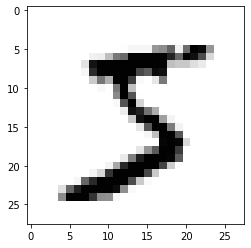

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [29]:

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

#print(X_train[0])

# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))

# 바이너리화 과정
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train[0])

### 딥러닝 기본 프레임 만들기


Epoch 1: val_loss improved from inf to 0.14749, saving model to ./model\01-0.1475.hdf5

Epoch 2: val_loss improved from 0.14749 to 0.10245, saving model to ./model\02-0.1025.hdf5

Epoch 3: val_loss improved from 0.10245 to 0.08911, saving model to ./model\03-0.0891.hdf5

Epoch 4: val_loss improved from 0.08911 to 0.07654, saving model to ./model\04-0.0765.hdf5

Epoch 5: val_loss improved from 0.07654 to 0.07351, saving model to ./model\05-0.0735.hdf5

Epoch 6: val_loss improved from 0.07351 to 0.06725, saving model to ./model\06-0.0672.hdf5

Epoch 7: val_loss improved from 0.06725 to 0.06570, saving model to ./model\07-0.0657.hdf5

Epoch 8: val_loss improved from 0.06570 to 0.06225, saving model to ./model\08-0.0622.hdf5

Epoch 9: val_loss improved from 0.06225 to 0.06164, saving model to ./model\09-0.0616.hdf5

Epoch 10: val_loss did not improve from 0.06164

Epoch 11: val_loss did not improve from 0.06164

Epoch 12: val_loss did not improve from 0.06164

Epoch 13: val_loss improved 

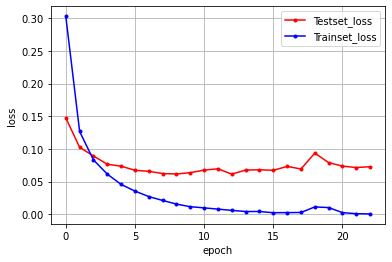

In [28]:
model = Sequential()
model.add(Dense(512, input_shape=(784,) ,activation="relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 위의 그림을 통해 학습셋에 대한 오차는 계속해서 줄어들며
* 테스트셋의 과적합이 일어나기 전 학습을 끝낸 모습을 볼 수 있다.

### 더 깊은 딥러닝 
   * 위의 정확도 98.25%보인 딥러닝 프레임은 하나의 은닉층을 둔 아주 단순한 모델이다.
   * 딥러닝은 이러한 기본 모델을 바탕으로, 프로젝트에 맞춰서 어떤 옵션을 더하고
     어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있다.

   * 기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을 보이는 컨볼루션 신경망
     (Convolutinal Neural Network, CNN)을 얹어보고자 한다.

### 컨볼루션 신경망
   * 컨볼루션 신경망은 입력된 이미징서 다시 한번 특징을 추출하기 위해 마스크(필터, 윈도, 또는 커널)를 도입하는 기법이다.






      
      
      ##### 맥스 풀링
   * 위의 결과가 여전히 크고 복잡하면 이를 다시 한번 축소해야함
         
         -> 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라고 함
   * 맥스 풀링은 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버리는 것

   * 노드가 많아지거나 층이 많아져 과적합 발생 -> 드롭아웃(drop out)기법 이용


Epoch 1: val_loss improved from inf to 0.05248, saving model to ./model\01-0.0525.hdf5

Epoch 2: val_loss improved from 0.05248 to 0.03991, saving model to ./model\02-0.0399.hdf5

Epoch 3: val_loss improved from 0.03991 to 0.03818, saving model to ./model\03-0.0382.hdf5

Epoch 4: val_loss improved from 0.03818 to 0.03213, saving model to ./model\04-0.0321.hdf5

Epoch 5: val_loss improved from 0.03213 to 0.03154, saving model to ./model\05-0.0315.hdf5

Epoch 6: val_loss improved from 0.03154 to 0.02835, saving model to ./model\06-0.0283.hdf5

Epoch 7: val_loss did not improve from 0.02835

Epoch 8: val_loss did not improve from 0.02835

Epoch 9: val_loss did not improve from 0.02835

Epoch 10: val_loss did not improve from 0.02835

Epoch 11: val_loss did not improve from 0.02835

Epoch 12: val_loss did not improve from 0.02835

Epoch 13: val_loss improved from 0.02835 to 0.02686, saving model to ./model\13-0.0269.hdf5

Epoch 14: val_loss did not improve from 0.02686

Epoch 15: val_loss

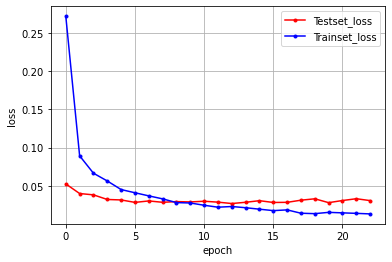

In [41]:
# 케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D()
# -> 첫 번째 인자: 마스크를 몇개 적용할지 정하는 것
# -> Kernel_size: 마스크의 크기를 정한다. kernel_size = (행, 열) 형식으로
# -> Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려 주어야 한다.
     # input_shape = (행, 열, 색상 또는 흑백) 형식으로 정한다. 
     # 만약 입력 이미지가 색상이면 3, 흑백이면 1을 지정

from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28,28,1) ,activation ="relu"))

# 컨볼루션 층을 하나 더 추가
model.add(Conv2D(64, (3,3), activation = 'relu'))

# 맥스풀링
model.add(MaxPooling2D(pool_size=2))

# 25%의 노드를 끄기
model.add(Dropout(0.25))

# 위의 컨볼루션 층에 연결하기 위해 Flatten()함수를 이용하여 1차원으로 바꿔주기
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))






# 컨볼루션 신경망 실행
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()